# Reporte de Análisis VIII

## Identificando y Excluyendo Outliers

In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [10]:
datos = pd.read_csv('alquiler_residencial.csv', sep = ';')

In [20]:
datos.describe().round(0)

,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
count,22580.0,22580.0,22580.0,22580.0,22571.0,20765.0,15795.0
mean,3.0,1.0,1.0,136.0,4986.0,1643.0,799.0
std,1.0,13.0,1.0,145.0,32451.0,45637.0,4486.0
min,0.0,0.0,0.0,10.0,100.0,1.0,1.0
25%,2.0,0.0,0.0,64.0,1500.0,572.0,96.0
50%,2.0,1.0,1.0,90.0,2700.0,940.0,220.0
75%,3.0,2.0,1.0,150.0,5300.0,1600.0,525.0
max,32.0,1960.0,14.0,3000.0,4500000.0,6552570.0,450625.0


(100.0, 4500000.0)

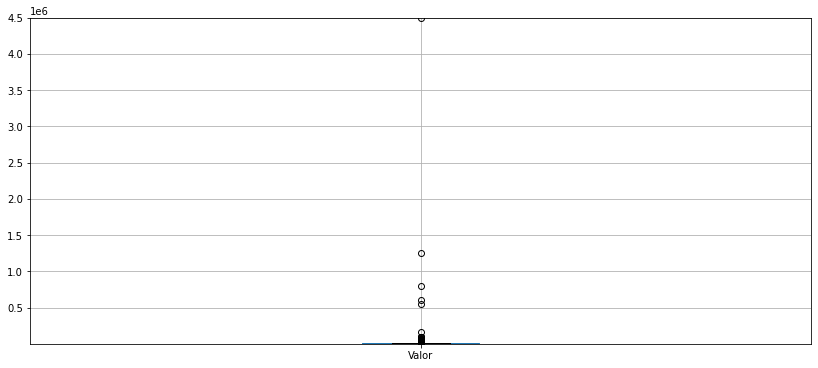

In [32]:
datos.boxplot(['Valor']).set_ylim((datos.Valor.min(), datos.Valor.max()))

In [33]:
datos[datos['Valor'] >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
7894,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0
11013,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,NaN
13099,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0
14325,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0
16056,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,NaN


In [34]:
valor = datos['Valor']

In [35]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [36]:
seleccion = (valor >= limite_inferior) & (valor <= limite_superior)
datos_new = datos[seleccion]

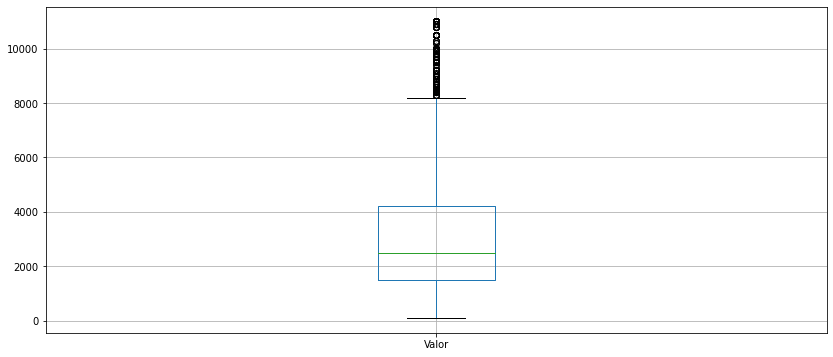

In [37]:
datos_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a41619d30>]],
      dtype=object)

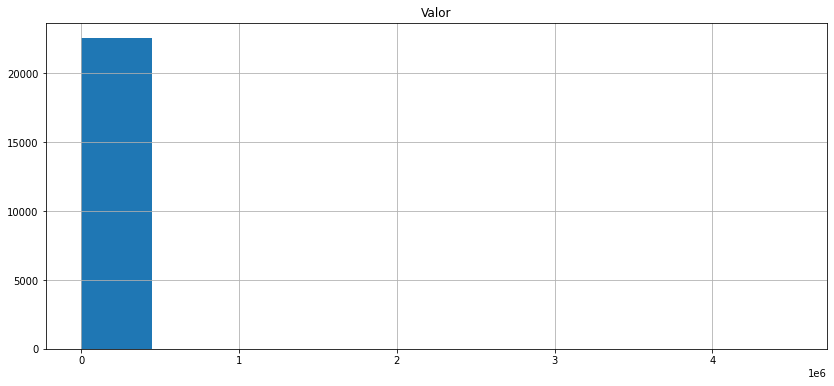

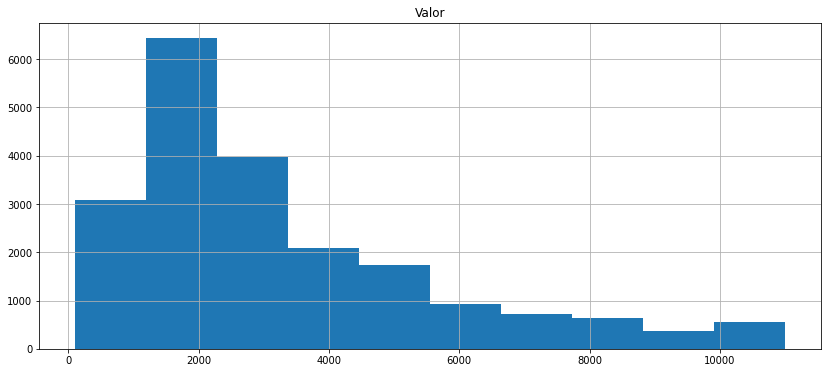

In [38]:
datos.hist(['Valor'])
datos_new.hist(['Valor'])

## Identificando y Excluyendo Outliers (continuación)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(100.0, 4500000.0)

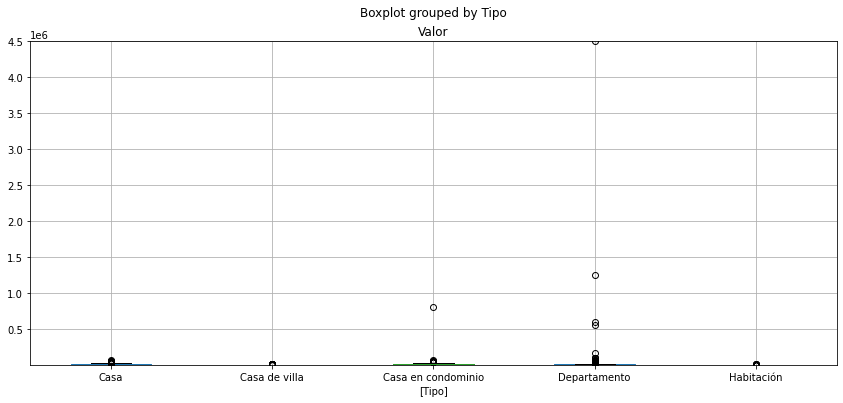

In [40]:
datos.boxplot(['Valor'], by = ['Tipo']).set_ylim((datos.Valor.min(), datos.Valor.max()))

In [41]:
grupo_tipo = datos.groupby('Tipo')['Valor']

In [42]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [43]:
grupo_tipo.groups

{'Casa': [1, 24, 56, 60, 100, 104, 150, 166, 188, 248, 260, 263, 274, 297, 321, 327, 345, 350, 368, 389, 396, 410, 436, 446, 486, 487, 493, 526, 558, 559, 583, 587, 588, 636, 639, 648, 654, 655, 680, 697, 721, 742, 745, 781, 792, 802, 880, 897, 962, 1011, 1059, 1066, 1149, 1154, 1156, 1189, 1211, 1284, 1291, 1354, 1373, 1388, 1409, 1451, 1465, 1469, 1480, 1485, 1513, 1516, 1530, 1630, 1649, 1683, 1705, 1711, 1715, 1721, 1734, 1760, 1768, 1815, 1865, 1890, 1930, 1961, 1989, 1998, 2017, 2082, 2102, 2119, 2139, 2165, 2171, 2172, 2199, 2238, 2270, 2273, ...], 'Casa de villa': [85, 222, 230, 314, 343, 718, 846, 868, 943, 1042, 1391, 1400, 1487, 1533, 1596, 1686, 1719, 1754, 1824, 2151, 2320, 2338, 2519, 2609, 2624, 2682, 2718, 2809, 2927, 2962, 3072, 3079, 3112, 3120, 3404, 3535, 3632, 3822, 3946, 3981, 3984, 3989, 4230, 4283, 4290, 4302, 4481, 4592, 4984, 5321, 5342, 5347, 5371, 5471, 5591, 5721, 5787, 5916, 5945, 6111, 6150, 6198, 6211, 6235, 6253, 6411, 6448, 6515, 6565, 6620, 6647, 6989

In [44]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [45]:
Q1

Tipo
Casa                  1100.0
Casa de villa          750.0
Casa en condominio    4000.0
Departamento          1600.0
Habitación             900.0
Name: Valor, dtype: float64

In [46]:
Q3

Tipo
Casa                   9800.0
Casa de villa          1800.0
Casa en condominio    15250.0
Departamento           5000.0
Habitación             1500.0
Name: Valor, dtype: float64

In [47]:
IIQ

Tipo
Casa                   8700.0
Casa de villa          1050.0
Casa en condominio    11250.0
Departamento           3400.0
Habitación              600.0
Name: Valor, dtype: float64

In [48]:
limite_inferior

Tipo
Casa                 -11950.0
Casa de villa          -825.0
Casa en condominio   -12875.0
Departamento          -3500.0
Habitación                0.0
Name: Valor, dtype: float64

In [49]:
limite_superior

Tipo
Casa                  22850.0
Casa de villa          3375.0
Casa en condominio    32125.0
Departamento          10100.0
Habitación             2400.0
Name: Valor, dtype: float64

In [50]:
limite_superior['Casa']

22850.0

In [51]:
datos_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = datos['Tipo'] == tipo
    eh_dentro_limite = (datos['Valor'] >= limite_inferior[tipo]) & (datos['Valor'] <= limite_superior[tipo])
    seleccion = eh_tipo & eh_dentro_limite
    datos_seleccion = datos[seleccion]
    datos_new = pd.concat([datos_new, datos_seleccion])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


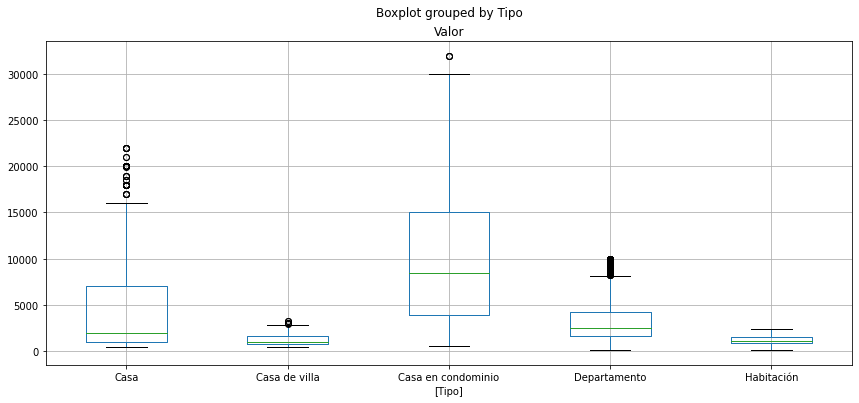

In [52]:
datos_new.boxplot(['Valor'], by = ['Tipo'])

In [53]:
datos_new.to_csv('alquiler_residencial_sin_outliers.csv', sep = ';', index = False)